In [34]:
import torch
import torch.nn as nn 
import matplotlib.pyplot as plt
import numpy as np

In [35]:
device = 'cuda' if torch.cuda.is_available() else "cpu"

device

'cpu'

In [36]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.01


X = torch.arange(start, end, step).unsqueeze(dim=1)

Y = weight * X + bias

In [37]:
X[:10],Y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

In [38]:
train_split = int(0.8 * len(X))


In [39]:
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

In [40]:
X.shape, X_train.shape, X_test.shape

(torch.Size([100, 1]), torch.Size([80, 1]), torch.Size([20, 1]))

In [41]:
def plot_prediction(
    train_data=X_train,
    train_labels=Y_train,
    test_data=X_test,
    test_labels=Y_test,
    predictions=None
):
    plt.figure(figsize=(10,5))

    plt.scatter(train_data, train_labels, c='b', s=10, label="Training Data")
    plt.scatter(test_data, test_labels, c='g', s=10, label="Test Data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=10, label="Prediction Data")
    
    plt.legend()
    plt.show()
        

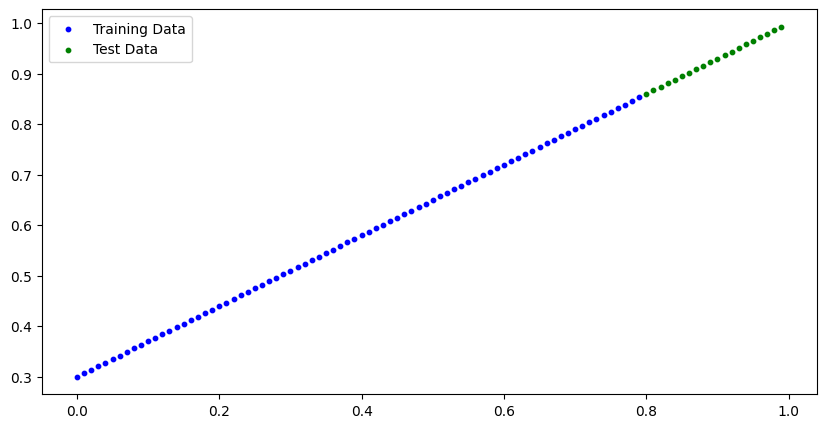

In [42]:
plot_prediction()

In [43]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    
    def forward(self, x: torch.tensor) -> torch.Tensor:
        return self.weight * x + self.bias

In [44]:
torch.manual_seed(42)

model_1 = LinearRegressionModel()

model_1.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [45]:
with torch.inference_mode():
    y_pred = model_1(X_test)


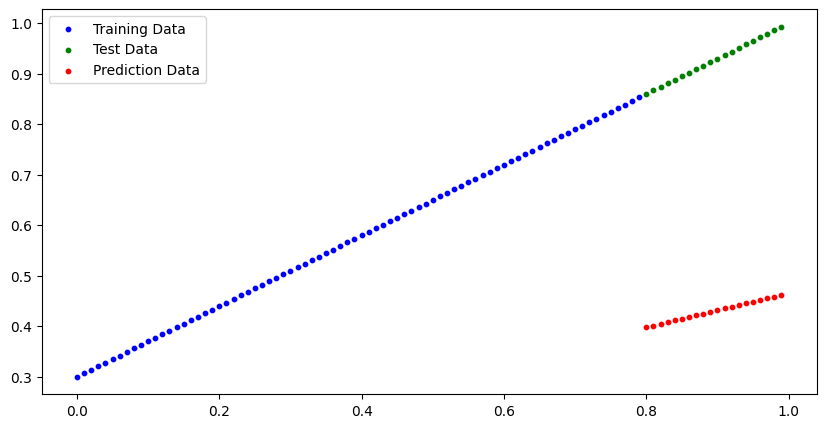

In [46]:
plot_prediction(predictions=y_pred)

In [47]:
torch.manual_seed(42)

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.01)

epoch_count=[]
train_loss_values = []
test_loss_values=[]

epochs = 180

for epoch in range(epochs):
    model_1.train()

    y_pred = model_1(X_train)

    loss = loss_fn(y_pred, Y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_1.eval()

    with torch.inference_mode():
        test_pred = model_1(X_test) 

        test_loss = loss_fn(test_pred, Y_test)

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch {epoch} | Loss: {loss} | Test Loss: {test_loss}")

model_1.state_dict()

Epoch 0 | Loss: 0.31469792127609253 | Test Loss: 0.48281747102737427
Epoch 10 | Loss: 0.19909533858299255 | Test Loss: 0.3474648892879486
Epoch 20 | Loss: 0.08958515524864197 | Test Loss: 0.21752354502677917
Epoch 30 | Loss: 0.05288771912455559 | Test Loss: 0.1439102590084076
Epoch 40 | Loss: 0.045192889869213104 | Test Loss: 0.11271438747644424
Epoch 50 | Loss: 0.04140976816415787 | Test Loss: 0.09821617603302002
Epoch 60 | Loss: 0.03795855492353439 | Test Loss: 0.0888485461473465
Epoch 70 | Loss: 0.034532517194747925 | Test Loss: 0.08085694909095764
Epoch 80 | Loss: 0.03110707364976406 | Test Loss: 0.07252134382724762
Epoch 90 | Loss: 0.027681414037942886 | Test Loss: 0.06452975422143936
Epoch 100 | Loss: 0.02425537072122097 | Test Loss: 0.05653815343976021
Epoch 110 | Loss: 0.02082989364862442 | Test Loss: 0.048202548176050186
Epoch 120 | Loss: 0.01740426756441593 | Test Loss: 0.04021095111966133
Epoch 130 | Loss: 0.013978230766952038 | Test Loss: 0.032219357788562775
Epoch 140 | Lo

OrderedDict([('weight', tensor([0.6944])), ('bias', tensor([0.2968]))])

In [48]:
with torch.inference_mode():
    y_pred_new = model_1(X_test)

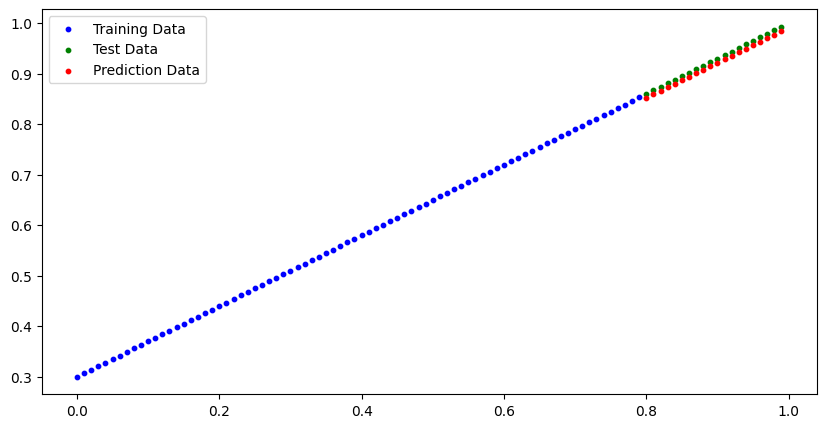

In [49]:
plot_prediction(predictions=y_pred_new)

In [50]:
torch.save(model_1.state_dict(), '../models/model_1.pth')

In [54]:
model_path = '../models/model_1.pth'

model = LinearRegressionModel()

model.load_state_dict(torch.load(model_path))

model.eval()

with torch.inference_mode():
    y_pred_loaded = model(X_test)

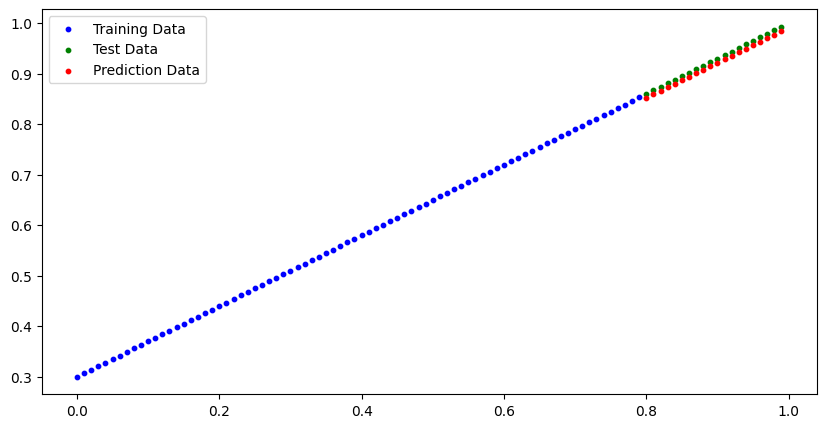

In [55]:
plot_prediction(predictions=y_pred_loaded)